In [1]:
# ライブラリ読み込み
import pandas as pd
import codecs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# メモリ削減
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
# csvを読み込みデータフレームに変換
df = {}
with codecs.open("../data/input/JPvideos.csv", "r", "utf-8", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
    df = reduce_mem_usage(df)

Memory usage of dataframe is 2.09 MB
Memory usage after optimization is: 4.30 MB
Decreased by -105.1%


In [24]:
# csvを読み込みデータフレームに変換
df = {}
with codecs.open("../../data/input/useVideos.csv", "r", "utf-8") as file:
    df = pd.read_table(file, delimiter=",")
    df = reduce_mem_usage(df)

# 不要な列が含まれているので削除
df = df.drop("Unnamed: 0", axis=1)
# 欠損値の削除
df = df.dropna()

/Users/tsurusekazuki/.local/share/virtualenvs/research-tiALBBof/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2,3,4,6,7,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Memory usage of dataframe is 24.29 MB
Memory usage after optimization is: 10.01 MB
Decreased by 58.8%


In [25]:
df = df.drop_duplicates()

## 基本的なデータ操作

colomns = list(df.columns)
for c in colomns:
    print(c)
print(len(colomns))

In [26]:
print(df.shape)
print(df.dtypes)
print(df.info())
print(df.isna())

(16493, 18)
video_id                  category
trending_date             category
title                     category
channel_title             category
category_id                float16
publish_time              category
tags                      category
views                      float32
likes                      float32
dislikes                   float32
comment_count              float32
thumbnail_link            category
comments_disabled         category
ratings_disabled          category
video_error_or_removed    category
description               category
channel_id                category
subscriber_count           float32
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 167584
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   video_id                16493 non-null  category
 1   trending_date           16493 non-null  category
 2   title        

## カラムごとのユニーク数とユニーク値の表示

In [6]:
for c, v in df.iteritems():
    num_uniques = v.nunique()
    print ('{name}: {num_unique}'.format(name=c, num_unique=num_uniques))
    print (v.unique())
    print ('\n')

video_id: 12912
[5ugKfHgsmYw, ohObafdd34Y, aBr2kKAHN6M, 5wNnwChvmsQ, B7J47qFvdsk, ..., f4NWt_O2vBg, 0EaUDUgczQ0, niKln6fWWrY, EmoDAd0eYiM, YdGVl1-WEgg]
Length: 12912
Categories (12912, object): [5ugKfHgsmYw, ohObafdd34Y, aBr2kKAHN6M, 5wNnwChvmsQ, ..., 0EaUDUgczQ0, niKln6fWWrY, EmoDAd0eYiM, YdGVl1-WEgg]


trending_date: 122
[18.07.02, 18.08.02, 18.09.02, 18.10.02, 18.11.02, ..., 18.10.06, 18.11.06, 18.12.06, 18.13.06, 18.14.06]
Length: 122
Categories (122, object): [18.07.02, 18.08.02, 18.09.02, 18.10.02, ..., 18.11.06, 18.12.06, 18.13.06, 18.14.06]


title: 13087
[陸自ヘリ、垂直に落下＝路上の車が撮影, イッテQ お祭り男宮川×手越 巨大ブランコ②, Live Views of Starman, 東京ディズニーリゾートの元キャストが暴露した秘密5選, 榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報, ..., まらしぃ（marasy） piano live tour 2018, 【ポケモンGO】カイオーガ５連戦＋１戦してたら思わぬ結果になった【色違い】, The Youth Board Asks #1 – How Does The Report ..., Harke Haldar | किन हुन दिएनन् खम्बेले देउतिको ..., 【あるある】現役アイドルとあるある再現したら闇が深すぎた…]
Length: 13087
Categories (13087, object): [陸自ヘリ、垂直に落下＝路上の車が撮影, イッテQ お祭り男宮川×手越 巨

## 統計量の表示

CPU times: user 170 ms, sys: 4.32 ms, total: 174 ms
Wall time: 181 ms


,Feature,Unique values,Most frequent item,Freuquence of most frequent item,Percentage of missing values,Percentage of values in the biggest category,Type
0,video_id,6905,nhbuZpcdHTo,18,0.0,0.109137,category
1,trending_date,122,18.12.06,203,0.0,1.230825,category
16,channel_id,2072,UCD7-Ocp4InwPKzwiq_U-Abg,343,0.0,2.079670,category
15,description,6269,Deweni Inima\nwatch all Episodes :- https://go...,170,0.0,1.030740,category
14,video_error_or_removed,2,False,16458,0.0,99.787789,category
13,ratings_disabled,2,False,15586,0.0,94.500697,category
12,comments_disabled,2,False,15471,0.0,93.803432,category
11,thumbnail_link,6905,https://i.ytimg.com/vi/nhbuZpcdHTo/default.jpg,18,0.0,0.109137,category
10,comment_count,2133,0,1161,0.0,7.039350,float32
9,dislikes,1297,0,1042,0.0,6.317832,float32


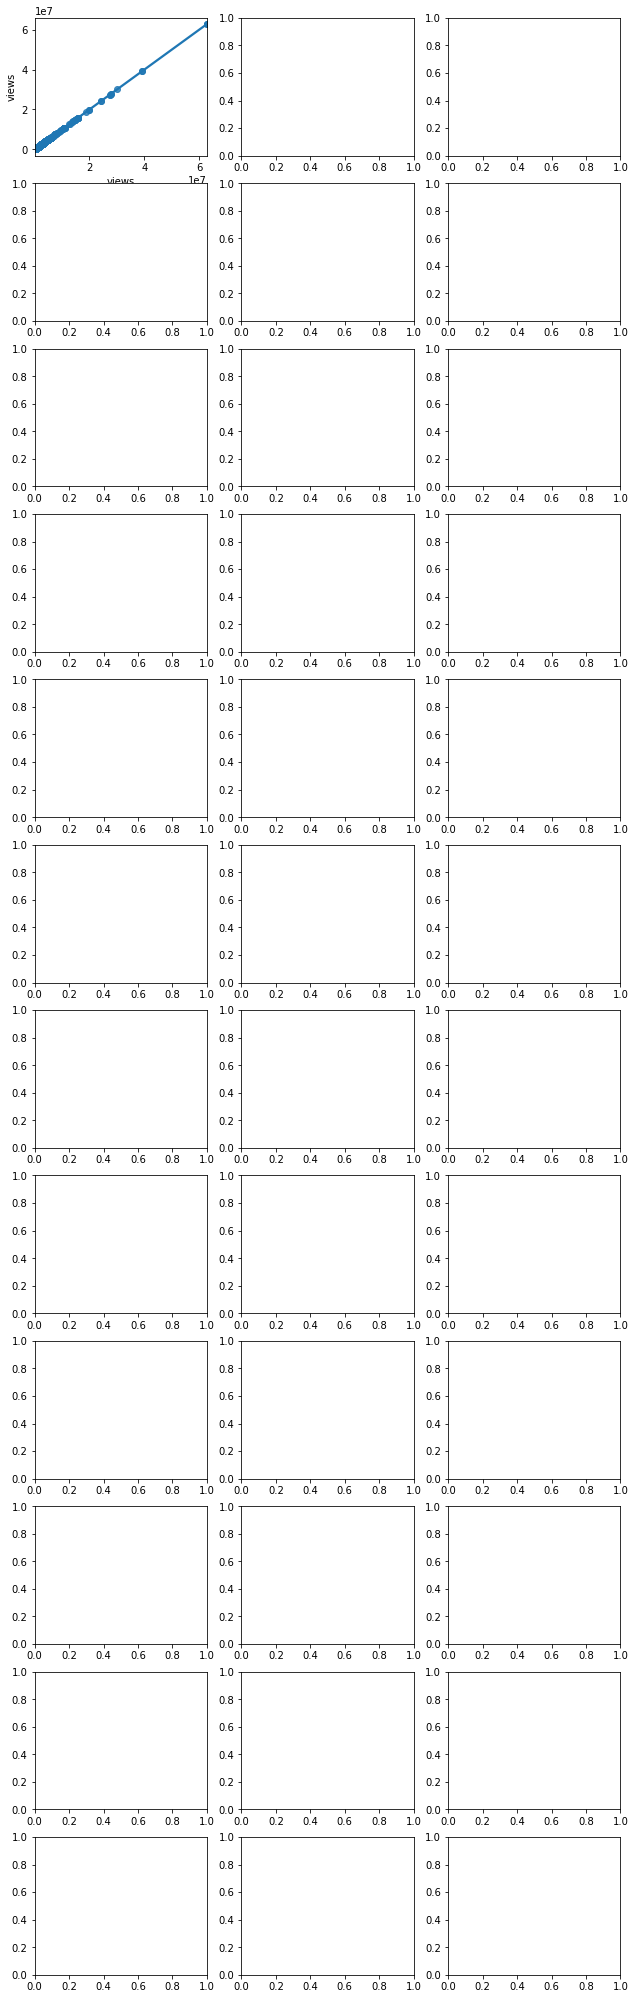

In [32]:
%%time
stats = []
for col in df.columns:
    stats.append((col,
                  df[col].nunique(),
                  df[col].value_counts().index[0],
                  df[col].value_counts().values[0],
                  df[col].isnull().sum() * 100 / df.shape[0],
                  df[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                  df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique values', 'Most frequent item', 'Freuquence of most frequent item', 'Percentage of missing values', 'Percentage of values in the biggest category', 'Type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

## 全カラムのヒストグラム

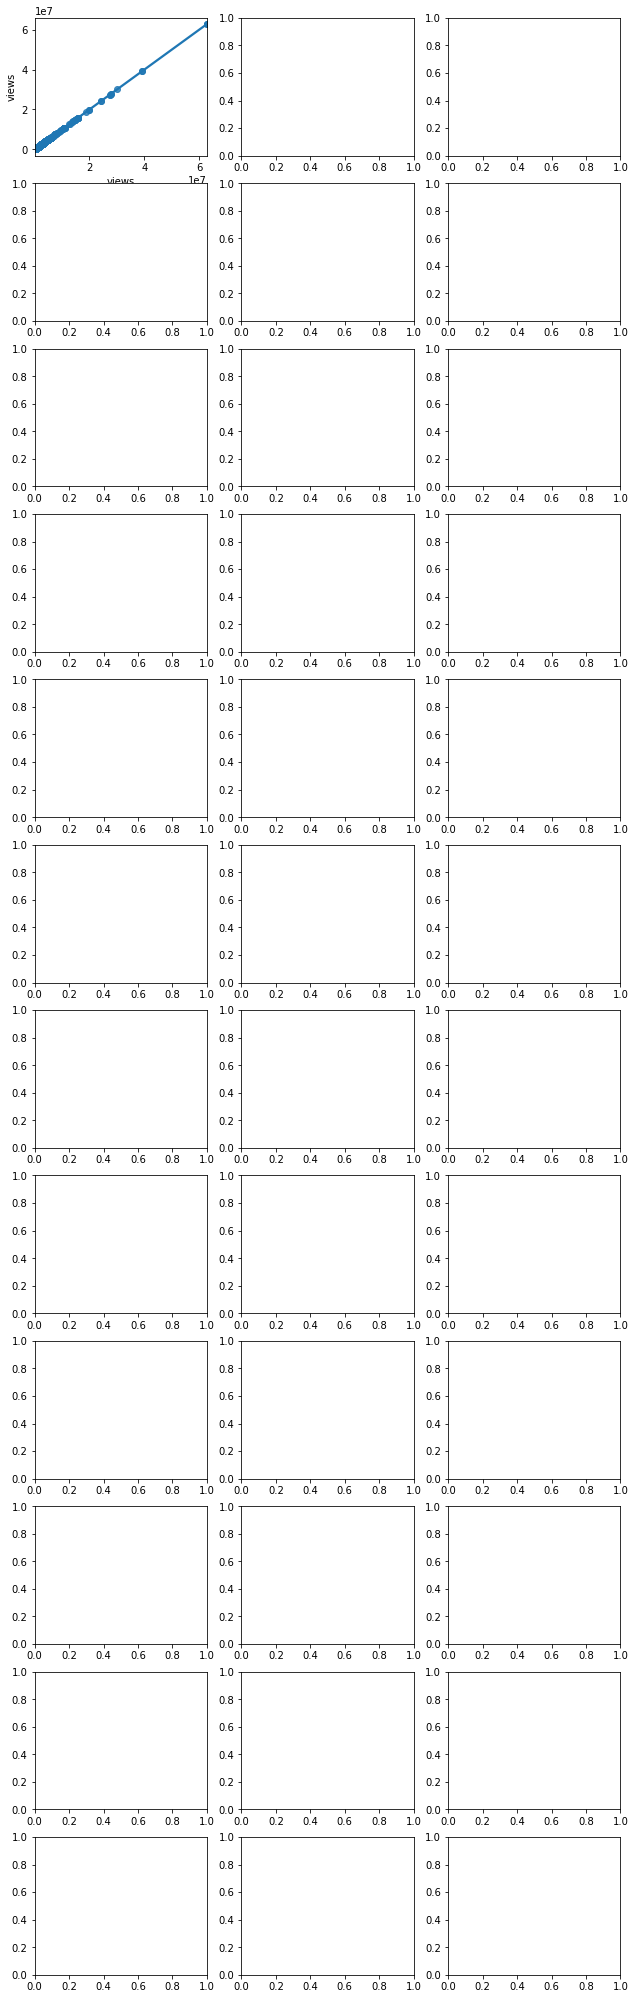

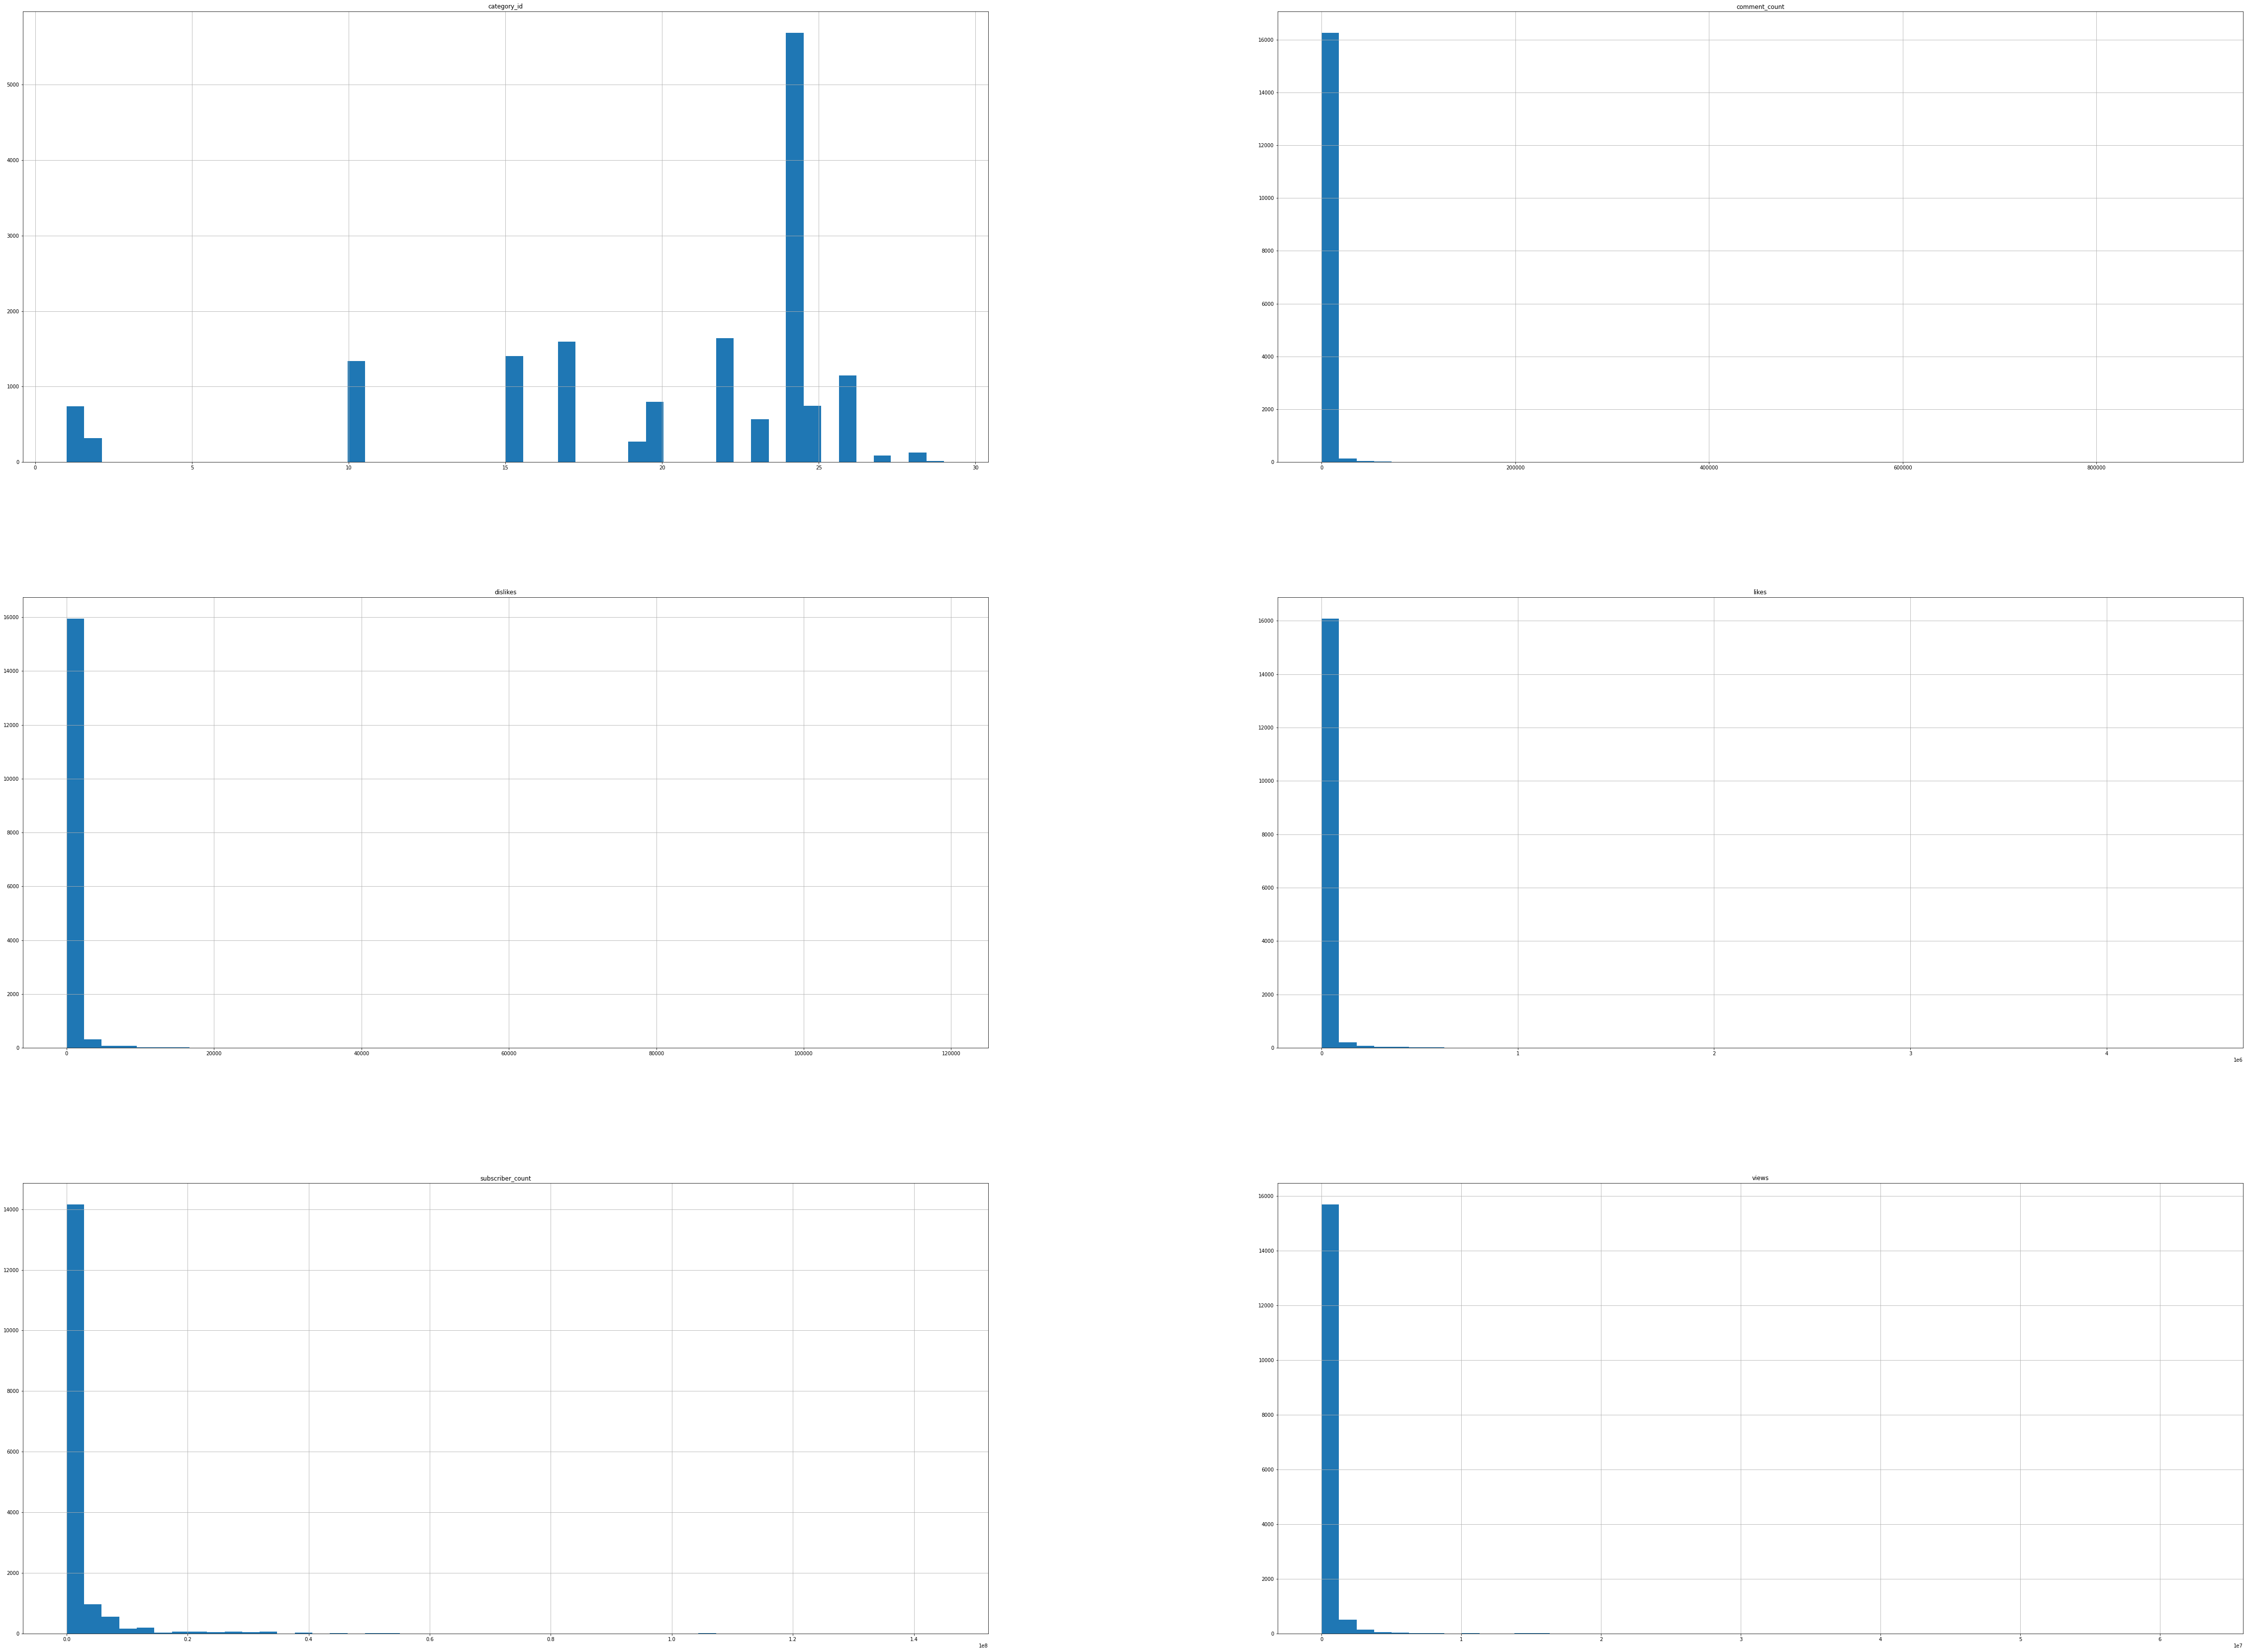

In [34]:
df.hist(bins=50, figsize=(80,60))
plt.show()

## 散布図

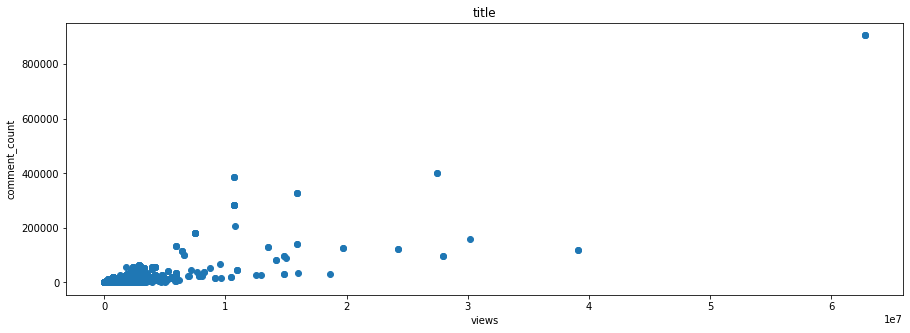

In [35]:
plt.figure(figsize=(15, 5))
plt.scatter(df['views'], df['comment_count'])
plt.title('title')
plt.xlabel('views')
plt.ylabel('comment_count')
plt.show()

## 欠損値をヒートマップで可視化

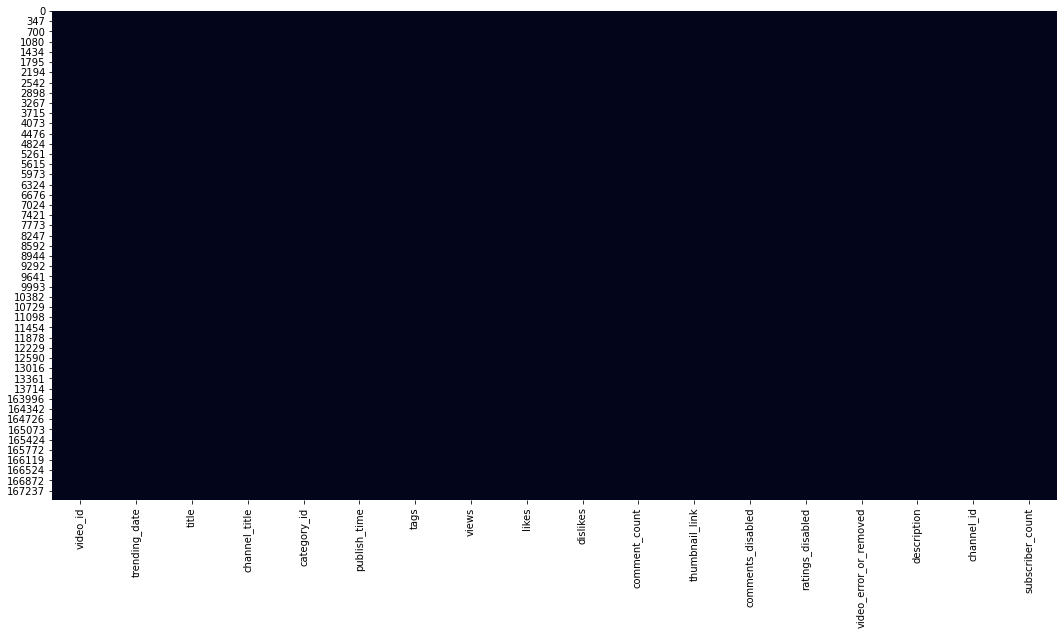

In [36]:
plt.figure(figsize=(18,9))
sns.heatmap(df.isnull(), cbar=False)

## 特徴量同士の相関をヒートマップで可視化

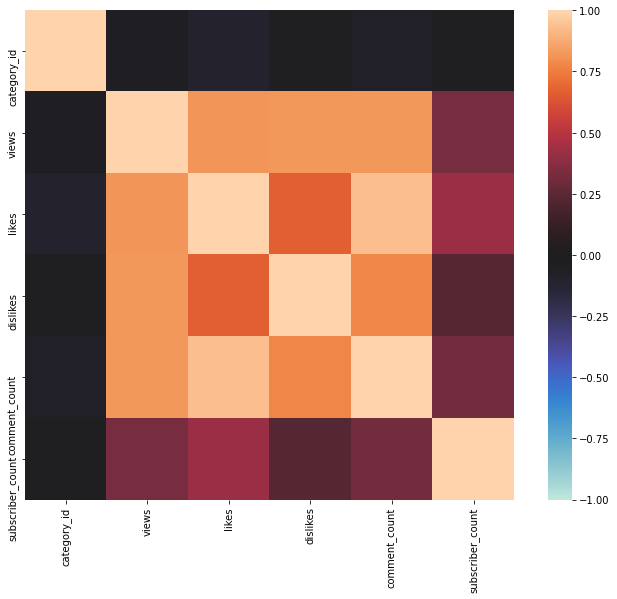

In [37]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df.corr(), square=True, vmax=1, vmin=-1, center=0)

## ターゲットとその他の特緒量との相関

In [38]:
df.corr()["views"].sort_values()

category_id        -0.042963
subscriber_count    0.332059
likes               0.814609
dislikes            0.826670
comment_count       0.826766
views               1.000000
Name: views, dtype: float64

## 分類タスクにおけるターゲットの相関

In [39]:
df['views'].value_counts()

42263.0      12
48922.0      11
96783.0      10
1364766.0    10
698931.0     10
             ..
53886.0       1
18246.0       1
64196.0       1
4486.0        1
88054.0       1
Name: views, Length: 7589, dtype: int64

In [40]:
numerical_feats = df.dtypes[df.dtypes != "category"].index
categorical_feats = df.dtypes[df.dtypes == "category"].index

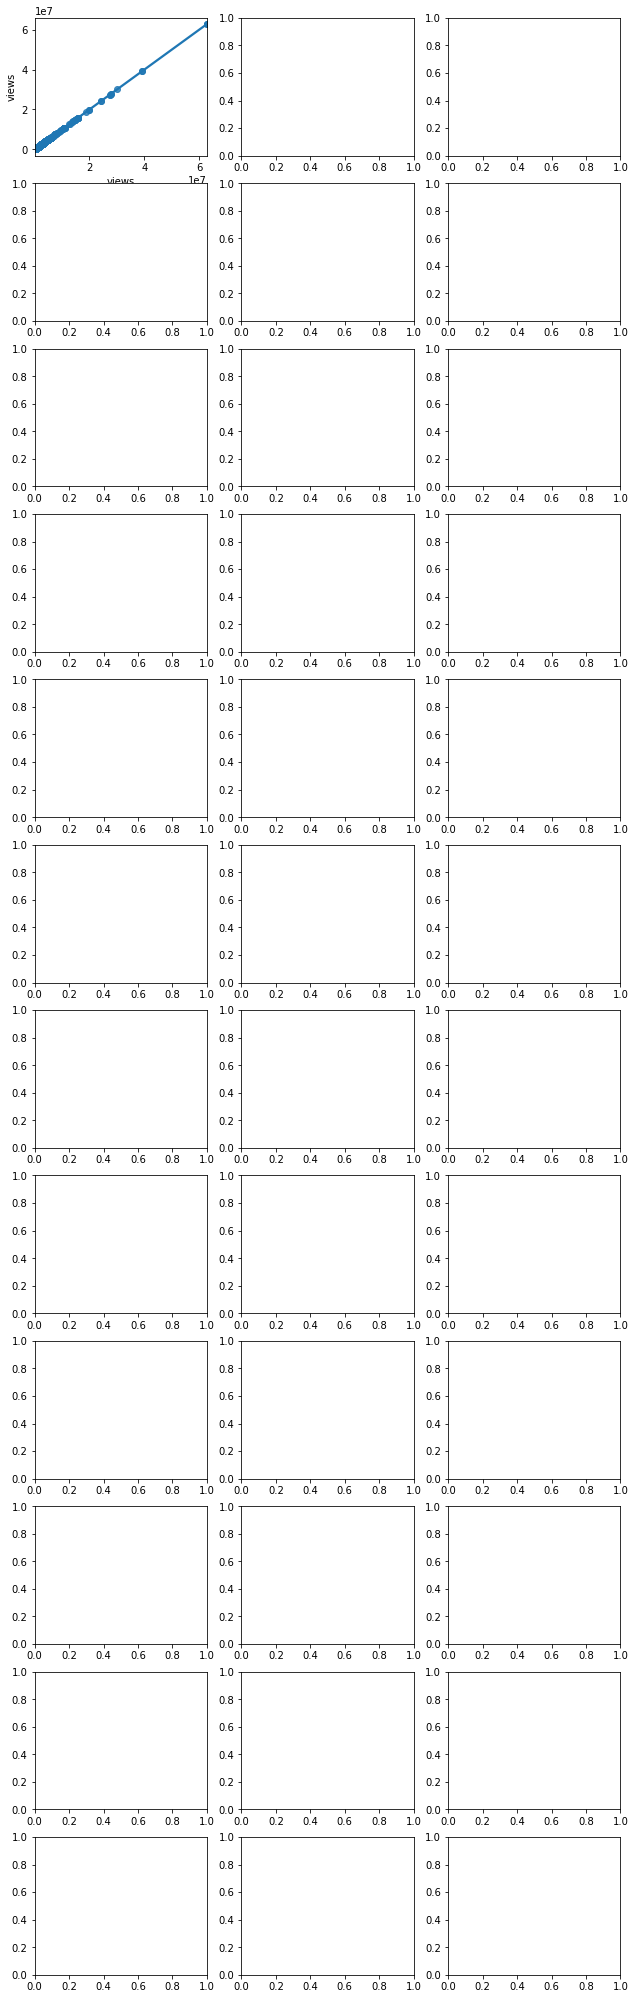

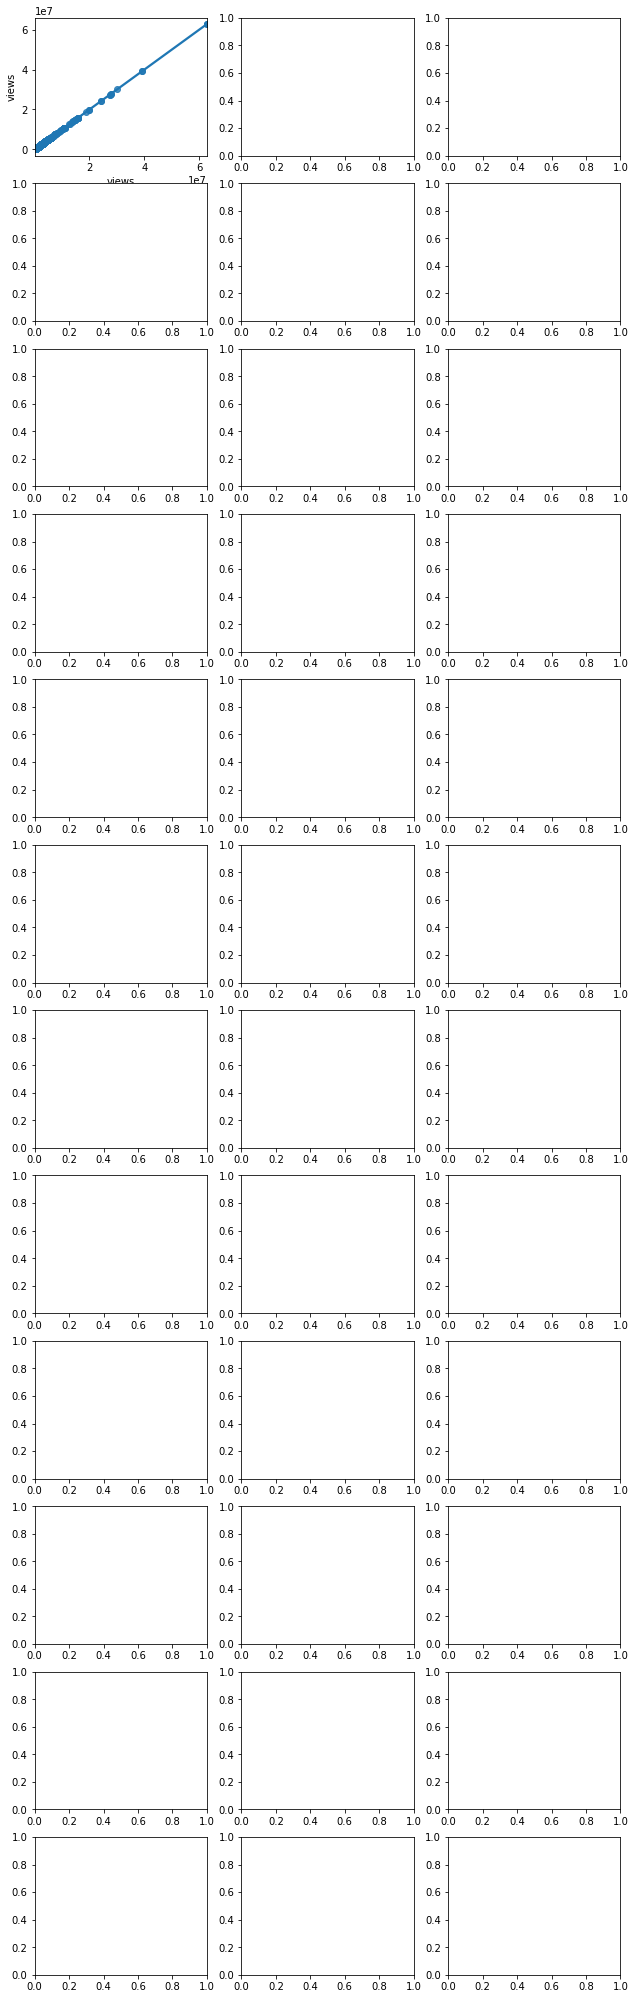

In [47]:
numerical_feats = ['category_id', 'views', 'likes', 'dislikes', 'comment_count']

In [42]:
categorical_feats

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'channel_id'],
      dtype='object')

## 欠損地の確認

In [43]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
subscriber_count,0,0.0
channel_id,0,0.0
trending_date,0,0.0
title,0,0.0
channel_title,0,0.0
category_id,0,0.0
publish_time,0,0.0
tags,0,0.0
views,0,0.0
likes,0,0.0


## Numerical Features

In [44]:
df.describe()

,category_id,views,likes,dislikes,comment_count,subscriber_count
count,1.649300e+04,1.649300e+04,1.649300e+04,16493.000000,16493.000000,16493.0
mean,inf,3.129426e+05,1.391734e+04,445.648773,1903.691772,2119270.5
std,6.644531e+00,1.396612e+06,1.063153e+05,2779.935059,17249.570312,6075251.0
min,1.000000e+00,1.151000e+03,0.000000e+00,0.000000,0.000000,0.0
25%,1.700000e+01,3.091700e+04,4.600000e+02,18.000000,76.000000,231000.0
50%,2.300000e+01,8.331700e+04,1.343000e+03,74.000000,233.000000,558000.0
75%,2.400000e+01,2.026370e+05,3.505000e+03,245.000000,653.000000,1380000.0
max,2.900000e+01,6.279639e+07,4.470923e+06,119053.000000,905925.000000,145000000.0


In [48]:
nr_rows = 12 #図を表示する際の行数
nr_cols = 3 #図を表示する際の列数
#nr_rows * nr_colsがカラム数を超えるように設定。

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ["category_id", "comments_disabled", "ratings_disabled"]
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
target = "views"

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df[target], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()    
plt.show()  

AttributeError: 'list' object has no attribute 'pearsonr'

上記より、目的変数であるviewsの説明変数は、likes、dislikes、comment_countであることが分かる

## Categorical Feature

In [17]:
for catg in list(categorical_feats) :
    print(df[catg].value_counts())
    print('#'*50)

#NAME?         282
5ugKfHgsmYw      8
geOSYId6tac      8
KqtWo-4A0LU      8
bmY9DnNH7rE      6
              ... 
RKjk0ECXjiQ      1
RKpjH-O8a6w      1
RL94v8akYP0      1
kMSsowUH21E      1
L94gGziIA5I      1
Name: video_id, Length: 12912, dtype: int64
##################################################
18.28.04    199
18.04.05    199
18.04.04    199
18.26.04    198
18.15.05    197
           ... 
18.07.02    128
18.28.03    102
18.19.05     92
18.20.05     56
18.15.03     40
Name: trending_date, Length: 122, dtype: int64
##################################################
【吹いたら負け】話題の面白い画像集                            17
リクエストを即興で弾き語ります！！！                           14
陸自ヘリ、垂直に落下＝路上の車が撮影                            8
西城秀樹の訃報を江原啓之が予言していた事実が発覚！１０年前の霊視で見えた内容とは？     8
【最強の飯テロ】絶対に深夜に見ないでください。                       7
                                             ..
イッテＱ  宮川  寒すぎて中岡になってしまうｗｗｗｗｗｗｗ                1
イッテQ　イモトｗｗスタッフと荷物の取り合いｗｗｗ                     1
イッテQ　イモト　美しすぎる棚田が全部人工物だったｗｗｗ          

In [3]:
 df = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD'))

In [4]:
df

,A,B,C,D
0,0.105609,0.041405,-1.220645,0.151224
1,-2.167734,1.535977,-1.537085,-0.285811
2,-0.342960,-0.382535,-0.251983,1.069953
3,0.909753,0.561787,-0.373395,-1.317242
4,0.739312,-1.698334,-0.416022,1.200312
5,-0.259973,0.321192,-1.470509,0.040961


In [ ]:
[1, 0, ]